In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def network_init(input_layer_nodes, middlw_layer_nodes, output_layer_nodes):
    """
        ネットワーク初期化
    """
    global middle_layer_weight,output_layer_weight
    np.random.seed(0) # 乱数の種
    middle_layer_weight = np.random.rand(input_layer_nodes+1,middlw_layer_nodes) # 重みをランダムに決定
    output_layer_weight = np.random.rand(middlw_layer_nodes+1,output_layer_nodes)# 重みをランダムに決定

def loss_function(input,correct):
    """
        損失関数
    """
    output = linear_calc(input,middle_layer_weight,output_layer_weight)
    matrix_elements = output.shape[0] # 行数x列数
    return(np.sum(np.power(output-correct,2))/matrix_elements) # 平均二乗誤差を返す

def numerical_differentiation(func, now_location):
    """
        微分関数
    """
    small_change = 0.01
    gradient = np.zeros_like(now_location) # まずゼロ埋め
    iterate = np.nditer(now_location, flags=['multi_index']) # 行列の全要素にアクセス
    while not iterate.finished: # アクセス完了まで
        i = iterate.multi_index # インデックス番号を取得(0,0のように)
        temp_value = now_location[i]
        now_location[i] = temp_value + small_change
        slightly_increase = func(now_location) # 微小に増やした時の関数の値
        now_location[i] = temp_value - small_change
        slightly_decrease = func(now_location) # 微小に減らした時の関数の値

        gradient[i] = (slightly_increase-slightly_decrease)/(2*small_change) # 傾き
        now_location[i] = temp_value # 増減させる前に戻す
        iterate.iternext()   # 次の繰り返しへ
    return gradient

def sigmoid(x): # 中間層での活性化関数
    """
        シグモイド関数
    """
    return 1/(1+np.exp(-x))

def softmax(x): # 出力層からの出力を確率に変換する時に使う
    """
        ソフトマックス関数
    """
    exp_x = np.exp(x)
    return exp_x / np.sum(np.exp(x), axis=1, keepdims=True)

def linear_calc(x,middle_layer_weight,output_layer_weight): 
    """
        線形計算
    """
    input_layer_value = np.insert(x,0,1,axis=1) # バイアスニューロンを加え、入力層の各ノードの値とする
    temp_middle_layer_value = np.dot(input_layer_value,middle_layer_weight) # 重みを掛けて合計
    middle_layer_value = sigmoid(temp_middle_layer_value) # 活性化関数を適用し中間層の各ノードの値とする
    middle_layer_value = np.insert(middle_layer_value,0,1,axis=1) # バイアスニューロンも加え、中間層の各ノードの値とする
    temp_output_layer_value = np.dot(middle_layer_value,output_layer_weight) # 重みを掛けて合計
    output_layer_value = softmax(temp_output_layer_value) # 自作ソフトマックス関数にて出力を確立に
    return output_layer_value


In [3]:
middle_layer_weight = [] # 中間層の重み
output_layer_weight = [] # 出力層の重み
error_recording_list = [] # 損失記録用のLIST

input_matrix = np.array([[0,0],[0,1],[1,0],[1,1]])

# correct_matrix = np.array([[0,1],[0,1],[0,1],[1,0]])  # ANDの時の確率 (線形に分類できる)
# correct_matrix = np.array([[0,1],[1,0],[1,0],[1,0]])  # ORの時の確率 (線形に分類できる)
# correct_matrix = np.array([[1,0],[1,0],[1,0],[0,1]])  # NANDの時の確率 (線形に分類できる)
correct_matrix = np.array([[0,0],[1,0],[0,1],[1,1]])  # XORの時の確率 (線形に分類できない)

loop_count = 5000
learning_rate = 0.2 # 勾配降下法の学習率

## main

network_init(input_layer_nodes=2, middlw_layer_nodes=3, output_layer_nodes=2) # 各層のノード数を可変に試せるように

print("初期状態の「中間層への」重み\n",middle_layer_weight)
print("初期状態の「出力層への」重み\n",output_layer_weight)

print("学習する前のネットワークの出力")
before_learning = linear_calc(input_matrix,middle_layer_weight,output_layer_weight)
input_matrix_counts = input_matrix.shape[0]

for i in range(input_matrix_counts):
    print(input_matrix[i],before_learning[i])

## Learning Start

for i in range(loop_count):
    ano_loss_function = lambda weights: loss_function(input_matrix,correct_matrix)

    gradients_middle_layer_weight=numerical_differentiation(ano_loss_function,middle_layer_weight)
    gradients_output_layer_weight=numerical_differentiation(ano_loss_function,output_layer_weight)

    middle_layer_weight -= learning_rate * gradients_middle_layer_weight # 重みを更新
    output_layer_weight -= learning_rate * gradients_output_layer_weight # 重みを更新

    loss_function_value=loss_function(input_matrix,correct_matrix)
    error_recording_list.append(loss_function_value)

    if (((i+1) % 500) == 0):
        print("-------------")
        print("i=",i+1,loss_function_value)

## Learning End

print("-------------")
print("学習後のネットワークの出力")
output_after_training = linear_calc(input_matrix,middle_layer_weight,output_layer_weight)

for i in range(input_matrix_counts):
    print(input_matrix[i],output_after_training[i])

初期状態の「中間層への」重み
 [[0.5488135  0.71518937 0.60276338]
 [0.54488318 0.4236548  0.64589411]
 [0.43758721 0.891773   0.96366276]]
初期状態の「出力層への」重み
 [[0.38344152 0.79172504]
 [0.52889492 0.56804456]
 [0.92559664 0.07103606]
 [0.0871293  0.0202184 ]]
学習する前のネットワークの出力
[0 0] [0.54587617 0.45412383]
[0 1] [0.58185528 0.41814472]
[1 0] [0.5650508 0.4349492]
[1 1] [0.5927264 0.4072736]
-------------
i= 500 0.26135575999244404
-------------
i= 1000 0.2533317121174085
-------------
i= 1500 0.2518225564506229
-------------
i= 2000 0.2512263526259586
-------------
i= 2500 0.2509143392474027
-------------
i= 3000 0.25072458308489287
-------------
i= 3500 0.2505978308797989
-------------
i= 4000 0.250507551215126
-------------
i= 4500 0.2504401763154307
-------------
i= 5000 0.2503880793868919
-------------
学習後のネットワークの出力
[0 0] [0.49990846 0.50009154]
[0 1] [0.98136495 0.01863505]
[1 0] [0.02070949 0.97929051]
[1 1] [0.49995287 0.50004713]


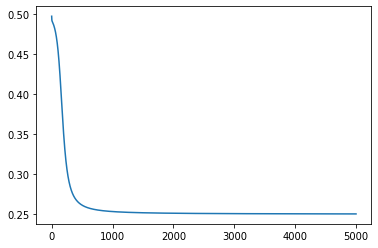

In [4]:
## 誤差が減っていく過程をPlot
x = np.arange(0,loop_count,1)
plt.plot(x,error_recording_list)
plt.show()